In [1]:
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [6]:
!pip install yfinance
#!pip install pandas

In [7]:
import yfinance as yf
import pandas as pd

In [8]:
tesla = yf.Ticker("TSLA")

# Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points 

In [82]:
tesla_info = tesla.info


In [83]:
tesla_share = tesla.history(period="max")

In [88]:
tesla_share.reset_index(inplace = True)
tesla_share

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...,...
2739,2021-05-17,575.549988,589.729980,561.200012,576.830017,32390400,0,0.0
2740,2021-05-18,568.000000,596.250000,563.380005,577.869995,36830600,0,0.0
2741,2021-05-19,552.549988,566.210022,546.979980,563.460022,39578400,0,0.0
2742,2021-05-20,575.000000,588.849976,571.070007,586.780029,30821100,0,0.0


In [85]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [61]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [62]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>Tesla Revenue 2009-2021 | TSLA | MacroTrends</title>]

In [64]:
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [70]:
tesla_revenue.head()

,Date,Revenue
0,2021-03-31,"$10,389"
1,2020-12-31,"$10,744"
2,2020-09-30,"$8,771"
3,2020-06-30,"$6,036"
4,2020-03-31,"$5,985"


In [71]:
GameStop = yf.Ticker("GME")

In [73]:
gme_data = GameStop.history(period = 'max')

# Question 3: Use yfinance to Extract Stock Data

In [74]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [76]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [77]:
soup = BeautifulSoup(html_data, "html.parser")
soup.find_all('title')

[<title>GameStop Revenue 2006-2021 | GME | MacroTrends</title>]

In [78]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [79]:
gme_revenue.head()

,Date,Revenue
0,2021-01-31,"$2,122"
1,2020-10-31,"$1,005"
2,2020-07-31,$942
3,2020-04-30,"$1,021"
4,2020-01-31,"$2,194"


# Question 5: Plot Tesla Stock Graph

<AxesSubplot:xlabel='Date'>

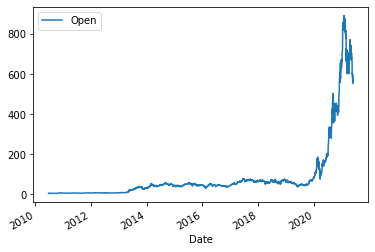

In [89]:
tesla_share.plot(x="Date", y="Open")

# Question 6: Plot GameStop Stock Graph

<AxesSubplot:xlabel='Date'>

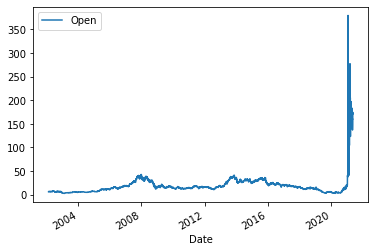

In [87]:
gme_data.plot(x="Date", y="Open")

# Thank you. 